In [161]:
import warnings
import numpy as np
import pandas as pd
import statsmodels.formula.api as smapi
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
np.set_printoptions(precision=2, edgeitems=3, linewidth=1000000)

In [162]:
# Read in some data
df = pd.read_csv('PredictedR2.csv')
print(df)

     X   Y
0   70  23
1   68  30
2   76  26
3   69  11
4   82  10
5   83   3
6   79   9
7   78  12
8   88   7
9   91  39
10  89  23
11  73  19


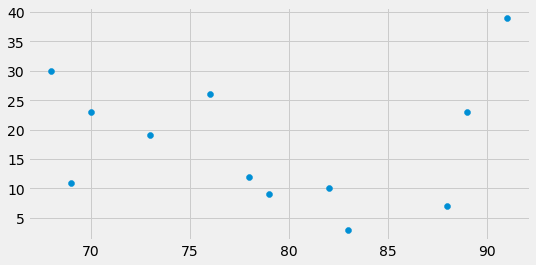

In [163]:
plt.figure(figsize=(8,4))
plt.scatter(df.X, df.Y)

In [164]:
model = smapi.ols('Y ~ X', df)
fit = model.fit() 
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.100
Method:                 Least Squares   F-statistic:                  0.001805
Date:                Sun, 06 Sep 2020   Prob (F-statistic):              0.967
Time:                        20:37:13   Log-Likelihood:                -45.019
No. Observations:                  12   AIC:                             94.04
Df Residuals:                      10   BIC:                             95.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0979     33.851      0.564      0.5

In [165]:
# reference: # https://gist.github.com/benjaminmgross/d71f161d48378d34b6970fa6d7378837

def predicted_r2(y_true, y_pred, xs):
    residue = y_pred - y_true
    hat = xs.dot(np.linalg.pinv(xs))
    sqr = np.square(residue/(1 - np.diagonal(hat)))
    return 1 - sqr.sum() / (np.square(y_true - y_true.mean()).sum())

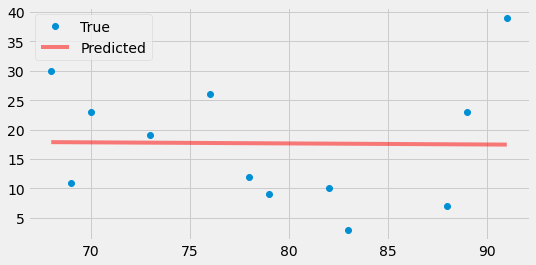

In [166]:
df['y_pred'] = fit.fittedvalues
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(df.X, df.Y, 'o', label="True")
ax.plot(df.sort_values('X')['X'], df.sort_values('X')['y_pred'], 'r-', label="Predicted", alpha=0.5)
ax.legend(loc='best')

In [167]:
# model with 3rd degree polynomial features

In [168]:
model2 = smapi.ols('Y ~ X + np.power(X, 2) + np.power(X, 3)', df)
fit2 = model2.fit() 
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     5.356
Date:                Sun, 06 Sep 2020   Prob (F-statistic):             0.0257
Time:                        20:37:14   Log-Likelihood:                -38.412
No. Observations:                  12   AIC:                             84.82
Df Residuals:                       8   BIC:                             86.76
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -9789.2550   4108.531     -2.

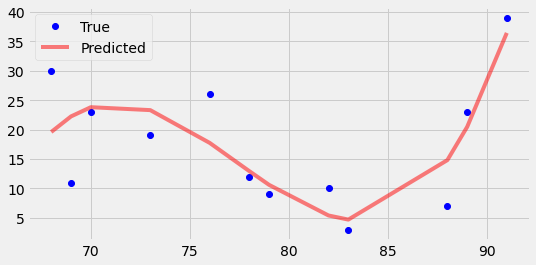

In [169]:
df['y_pred'] = fit2.fittedvalues
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(df.X, df.Y, 'bo', label="True")
ax.plot(df.sort_values('X')['X'], df.sort_values('X')['y_pred'], 'r-', label="Predicted", alpha=0.5)
ax.legend(loc='best')

In [170]:
print(f"Predicted R-squared (model 2): {predicted_r2(df.Y, fit2.fittedvalues, model2.exog)}")

Predicted R-squared (model 2): 0.0171958079499418


In [171]:
# model with 7th degree polynomial features

In [172]:
model3 = smapi.ols('Y ~ X + np.power(X, 2) + np.power(X, 3) + np.power(X, 4) + np.power(X, 5) + np.power(X, 6) + np.power(X, 7)', df)
fit3 = model3.fit() 
print(fit3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     4.863
Date:                Sun, 06 Sep 2020   Prob (F-statistic):             0.0341
Time:                        20:37:15   Log-Likelihood:                -37.044
No. Observations:                  12   AIC:                             84.09
Df Residuals:                       7   BIC:                             86.51
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.781e-06   7.06e-06      0.

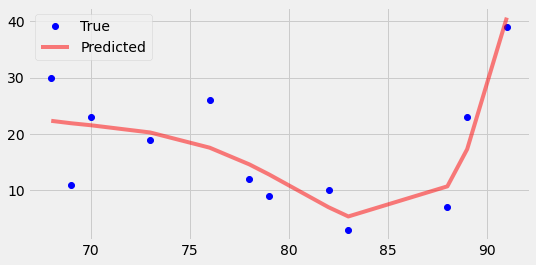

In [173]:
df['y_pred'] = fit3.fittedvalues
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(df.X, df.Y, 'bo', label="True")
ax.plot(df.sort_values('X')['X'], df.sort_values('X')['y_pred'], 'r-', label="Predicted", alpha=0.5)
ax.legend(loc='best')

In [174]:
print(f"Predicted R-squared (model 3): {predicted_r2(df.Y, fit3.fittedvalues, model3.exog)}")

Predicted R-squared (model 3): -0.6397628249278184
